### Generating reaction network
##### the recombination mihght not be considerd in this process
#### Stop tech. : Rank (the pyrolysis depth); the stable species
##### Generate the full reaction networks, all reactions(Hs map numbers are set to 0) are inclued in this networks
##### the species are smiles without any atom numbers

In [1]:
from NetGenerator.GenNet import NetGen, read_temp, trans_to_graph
dic_path = './templates/rmg_template.txt'
react_dic, react_dic_reverse = read_temp(dic_path)

Please install RMG-database!


In [2]:
smi_list = ['C1C[CH]CC1=O', 'C1CC[CH]C1=O', '[CH2]CCC[C]=O']
# smi_list = ['C1CCCC1(=O)']
ranks = 4
# path = r'./reactranker/model_results/final_results/b97d3_listnetdis_gauss_drop0.1_filter2'
# path = r'./reactranker/model_results/final_results/qm_rmg_evidential_ranking_penalty'
path = r'./reactranker/model_results/final_results/evidential_ranking'
cut_off = 2
bi_molecule = False
use_uncertainty = True
rank_pathways = True
min_paths = 1

In [3]:
import time
tic = time.time()
reaction_list, species_dic,info = NetGen(react_list=smi_list, ranks=ranks, cut_off=cut_off, min_paths=min_paths, 
                                    bi_molecule=False, react_dic=react_dic, react_dic_reverse=react_dic_reverse,
                                    use_uncertainty=use_uncertainty, use_reverse_temp=True, dropped_temp=[], 
                                    model_path=path, show_info=True, rank_pathways=True, using_rmg_database=False,
                                    rmg_estimator='rate rules', temperature=1393)
toc = time.time()
print('running time:', toc-tic)

['[CH2]C(=O)CC=C', 'C=CCC[C]=O', '[CH2]CC1CC1=O', 'O=[C]CC1CC1', 'O=C1CC=CC1', '[H]', 'O=C1C=CCC1', '[O]C12CCC1C2', '[CH2]CCC=C=O', '[CH2]CC(=O)C=C', '[O]C1=CCCC1', '[C-]#[O+]', '[CH2]CC[CH2]', 'C1CC1', 'C=C=O', 'C=C', 'O=C1CC1']
*******************
['[CH]=C', '[CH2]C=C', '[CH2]C1CC(=O)C1', '[CH2]CC=C', '[CH2]C1CCC1=O', '[CH2]C(=O)C1CC1', '[CH2]C1CC1', '[CH2]C=CC[C]=O', 'O=C1[CH]C=CC1', '[CH2]C=CC([CH2])=O', '[CH2]CC=C[C]=O', 'O=C1[C]CCC1', 'O=C1C=C[CH]C1', 'O=C1[CH]CC=C1', 'O=C1C[C]CC1', 'O=[C]C1CCC1', '[CH]=C=O', '[CH2]C=C=O', 'C=CC1([O])CC1', 'C=C[C]=O', '[CH2][CH2]', 'C=CCC', '[CH2]C[CH2]', '[CH]C=O', '[CH]C', '[CH2]C([CH2])=O', '[CH2]C[C]=O']
*******************
['[C]=C', 'C#C', 'C=C=C', 'C=C[CH]C', 'C=CC=C', '[CH2]C=C[CH2]', 'C=CC1CC1=O', '[CH2]C=CC=C=O', '[CH2]C(=O)[CH]C=C', 'O=C=CC1CC1', '[CH2]C[CH]C=C=O', '[CH2]CC1[CH]C1=O', '[C]C(=O)CC[CH2]', 'C=CC=C[C]=O', 'O=C1C=CC=C1', 'C1=C[C]2OC2C1', '[C]CCC([CH2])=O', '[C]CC(=O)C[CH2]', '[CH]1CCC1', 'C#C[O]', '[C]=C=O', 'O=C1[CH]C1', '[

In [4]:
print(len(reaction_list))
print(len(species_dic))
print(info)
link_data, edges, links = trans_to_graph(reaction_list)

227
121
['all of the reactions ranked by ML models']


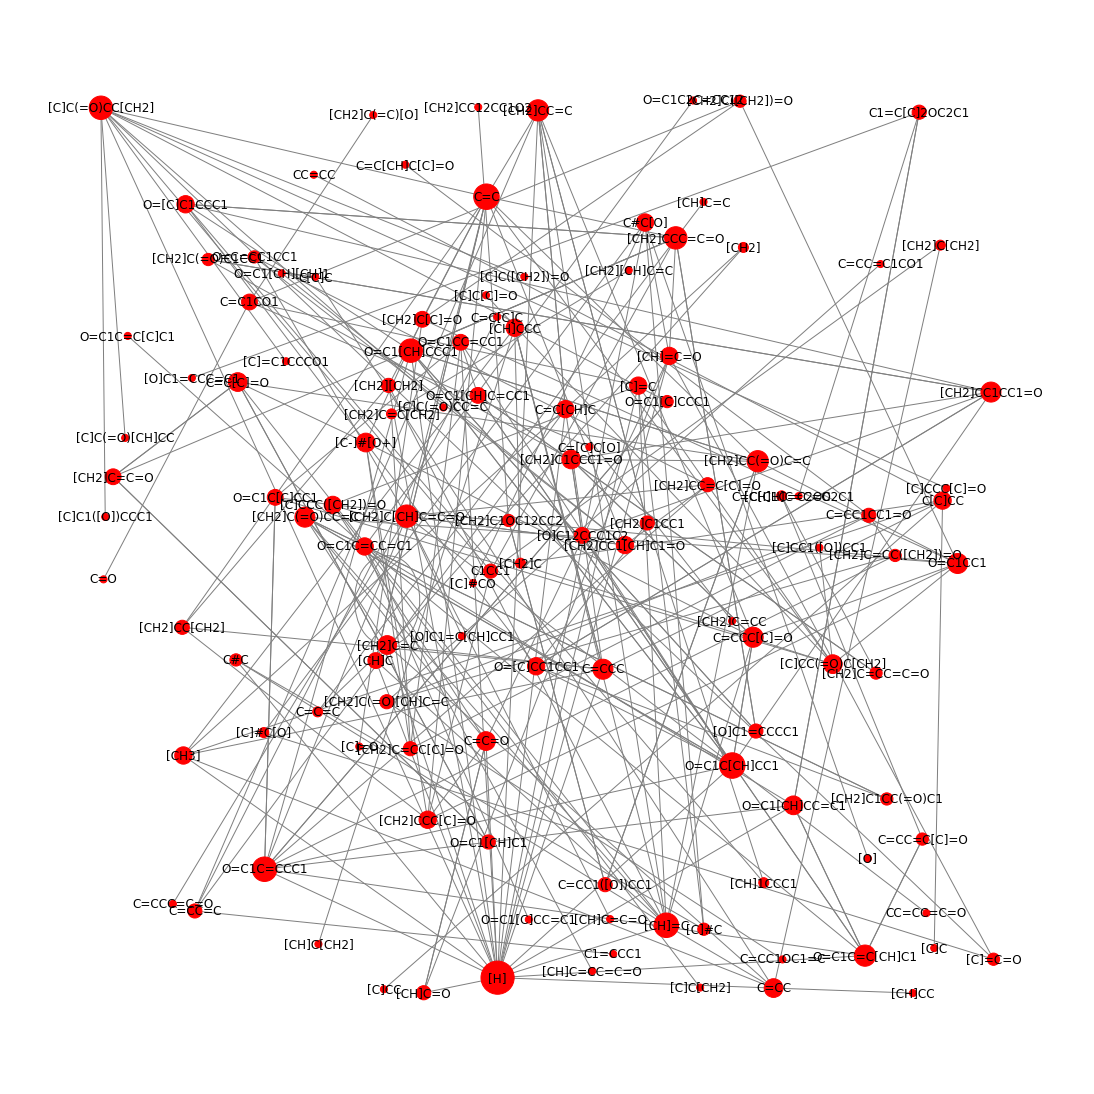

In [5]:
# draw reactions
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
seed = 123
random.seed(seed)
np.random.seed(seed)
G = nx.from_pandas_edgelist(edges, 'source', 'target', True, nx.DiGraph())
d = dict(G.degree)
# pos = nx.spring_layout(G, scale=10, k=3/np.sqrt(G.order()))
pos = nx.random_layout(G, seed=0)
# set the node_size
node_size = []
labels = {}
for item in G.degree:
    if len(item[0].split('.')) > 1:
        node_size.append(item[1]*0 + 5)
    else:
        node_size.append(item[1]*50)

plt.figure(3,figsize=(15,15))
nx.draw_random(G, arrows = False,  with_labels = True, node_color = 'red', alpha = 1, 
        node_size = node_size, font_size = 12, edge_color = 'gray') # [d[k]*50 for k in d]
plt.savefig('network.png', bbox_inches='tight')
plt.show()

In [6]:
# ground_truth=[['O=C1C[CH]CC1', 'C=CCC[C]=O'], ['O=C1C[CH]CC1', '[CH2]C(=O)CC=C'], ['O=C1[CH]CCC1', '[CH2]CCC=C=O'], ['O=C1[CH]CCC1', '[CH2]CC(=O)C=C'], ['[CH2]CCC[C]=O', '[C-]#[O+]'], ['[CH2]CCC[C]=O', '[CH2]CC[CH2]'], ['C=CCC[C]=O', '[C-]#[O+]'], ['C=CCC[C]=O', '[CH2]CC=C'], ['[CH2]C(=O)CC=C', 'C=C=O'], ['[CH2]C(=O)CC=C', '[CH2]C=C'], ['[CH2]CCC=C=O', 'C=C'], ['[CH2]CC(=O)C=C', 'C=C[C]=O'], ['[CH2]CC(=O)C=C', 'C=C'], ['[CH2]CC[CH2]', 'C=C'], ['[CH2]CC=C', 'C=CC=C'], ['[CH2]CC=C', '[H]'], ['[CH2]CC=C', 'C=C[CH]C'], ['[CH2]CC=C', 'C=C'], ['[CH2]CC=C', '[CH]=C'], ['C=C[C]=O', '[C-]#[O+]'], ['C=C[C]=O', '[CH]=C'], ['C=C[CH]C', 'C=CC=C'], ['C=C[CH]C', '[H]'], ['[CH]=C', '[H]'], ['[CH2]C=C', 'C=C=C'], ['[CH2]C=C', '[H]']]
# ground_truth=[['O=C1CCCC1', '[H]'],['O=C1CCCC1', 'O=C1C[CH]CC1'], ['O=C1CCCC1', 'O=C1[CH]CCC1'], ['O=C1CCCC1', '[CH2]CCC[C]=O'],
#              ['O=C1C[CH]CC1', 'C=CCC[C]=O'], ['O=C1C[CH]CC1', '[CH2]C(=O)CC=C'], ['O=C1[CH]CCC1', '[CH2]CCC=C=O'], ['[CH2]CCC=C=O', 'C=C'], ['[CH2]CCC=C=O', '[CH2]C=C=O'], ['O=C1[CH]CCC1', '[CH2]CC(=O)C=C'], ['[CH2]CCC[C]=O', '[C-]#[O+]'], ['[CH2]CCC[C]=O', '[CH2]CC[CH2]'], ['C=CCC[C]=O', '[C-]#[O+]'], ['C=CCC[C]=O', '[CH2]CC=C'], ['[CH2]C(=O)CC=C', 'C=C=O'], ['[CH2]C(=O)CC=C', '[CH2]C=C'], ['[CH2]CC(=O)C=C', 'C=C[C]=O'], ['[CH2]CC(=O)C=C', 'C=C'], ['[CH2]CC[CH2]', 'C=C'], ['[CH2]CC=C', 'C=CC=C'], ['[CH2]CC=C', '[H]'], ['[CH2]CC=C', 'C=C[CH]C'], ['[CH2]CC=C', 'C=C'], ['[CH2]CC=C', '[CH]=C'], ['C=C[C]=O', '[C-]#[O+]'], ['C=C[C]=O', '[CH]=C'], ['C=C[CH]C', 'C=CC=C'], ['C=C[CH]C', '[H]'], ['[CH]=C', '[H]'], ['[CH2]C=C', 'C=C=C'], ['[CH2]C=C', '[H]'], ['[CH]=C', 'C#C']]
# counter = 0
ground_truth=[['O=C1C[CH]CC1', 'C=CCC[C]=O'], ['O=C1C[CH]CC1', '[CH2]C(=O)CC=C'], ['O=C1[CH]CCC1', '[CH2]CCC=C=O'], 
              ['[CH2]CCC=C=O', 'C=C'], ['[CH2]CCC=C=O', '[CH2]C=C=O'], ['O=C1[CH]CCC1', '[CH2]CC(=O)C=C'], 
              ['[CH2]CCC[C]=O', '[C-]#[O+]'], ['[CH2]CCC[C]=O', '[CH2]CC[CH2]'], ['C=CCC[C]=O', '[C-]#[O+]'], 
              ['C=CCC[C]=O', '[CH2]CC=C'], ['[CH2]C(=O)CC=C', 'C=C=O'], ['[CH2]C(=O)CC=C', '[CH2]C=C'], 
              ['[CH2]CC(=O)C=C', 'C=C[C]=O'], ['[CH2]CC(=O)C=C', 'C=C'], ['[CH2]CC[CH2]', 'C=C'], ['[CH2]CC=C', 'C=CC=C'], 
              ['[CH2]CC=C', '[H]'], ['[CH2]CC=C', 'C=C[CH]C'], ['[CH2]CC=C', 'C=C'], ['[CH2]CC=C', '[CH]=C'], 
              ['C=C[C]=O', '[C-]#[O+]'], ['C=C[C]=O', '[CH]=C'], ['C=C[CH]C', 'C=CC=C'], ['C=C[CH]C', '[H]'], ['[CH]=C', '[H]'], 
              ['[CH2]C=C', 'C=C=C'], ['[CH2]C=C', '[H]'], ['[CH]=C', 'C#C']]
counter = 0
unmentioned = []
mentioned = []
gt_species = []
for gt in ground_truth:
    if gt[0] not in gt_species:
        gt_species.append(gt[0])
    if gt[1] not in gt_species:
        gt_species.append(gt[1])
    gt_link = '>'.join(gt)
    if gt_link in links:
        counter += 1
        mentioned.append(gt)
    else:
        unmentioned.append(gt)
print('{} reaction paths in selected reactions, and the propotion is {}'.format(counter, counter/len(ground_truth)))
print(unmentioned)
print('the selected reaction is: ', mentioned)
print('the ground truth species is: ', len(gt_species))

28 reaction paths in selected reactions, and the propotion is 1.0
[]
the selected reaction is:  [['O=C1C[CH]CC1', 'C=CCC[C]=O'], ['O=C1C[CH]CC1', '[CH2]C(=O)CC=C'], ['O=C1[CH]CCC1', '[CH2]CCC=C=O'], ['[CH2]CCC=C=O', 'C=C'], ['[CH2]CCC=C=O', '[CH2]C=C=O'], ['O=C1[CH]CCC1', '[CH2]CC(=O)C=C'], ['[CH2]CCC[C]=O', '[C-]#[O+]'], ['[CH2]CCC[C]=O', '[CH2]CC[CH2]'], ['C=CCC[C]=O', '[C-]#[O+]'], ['C=CCC[C]=O', '[CH2]CC=C'], ['[CH2]C(=O)CC=C', 'C=C=O'], ['[CH2]C(=O)CC=C', '[CH2]C=C'], ['[CH2]CC(=O)C=C', 'C=C[C]=O'], ['[CH2]CC(=O)C=C', 'C=C'], ['[CH2]CC[CH2]', 'C=C'], ['[CH2]CC=C', 'C=CC=C'], ['[CH2]CC=C', '[H]'], ['[CH2]CC=C', 'C=C[CH]C'], ['[CH2]CC=C', 'C=C'], ['[CH2]CC=C', '[CH]=C'], ['C=C[C]=O', '[C-]#[O+]'], ['C=C[C]=O', '[CH]=C'], ['C=C[CH]C', 'C=CC=C'], ['C=C[CH]C', '[H]'], ['[CH]=C', '[H]'], ['[CH2]C=C', 'C=C=C'], ['[CH2]C=C', '[H]'], ['[CH]=C', 'C#C']]
the ground truth species is:  21


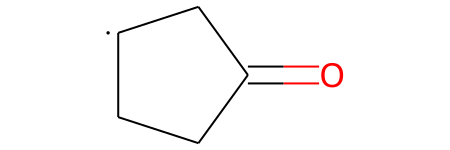

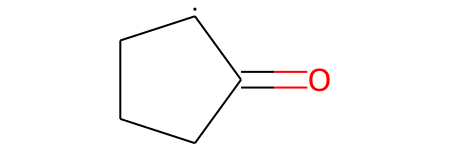

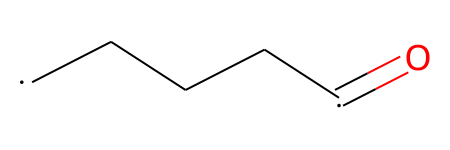

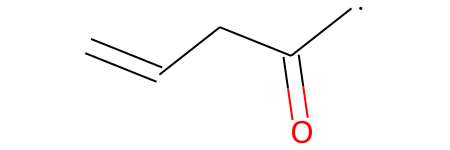

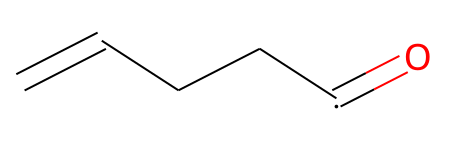

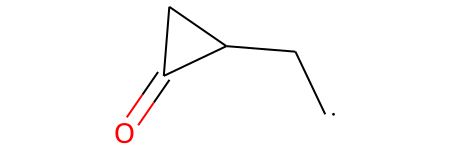

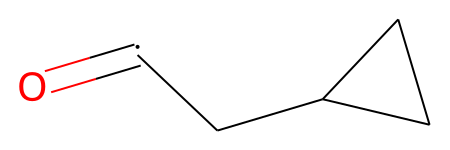

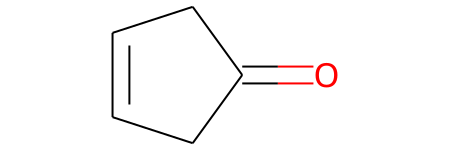

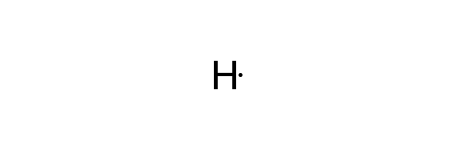

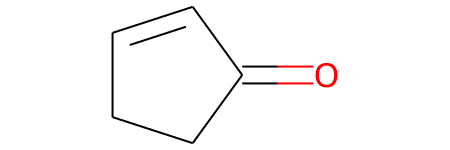

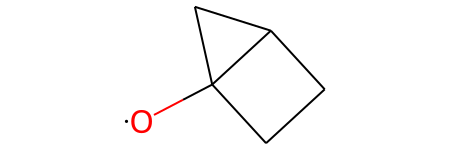

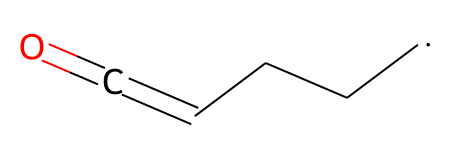

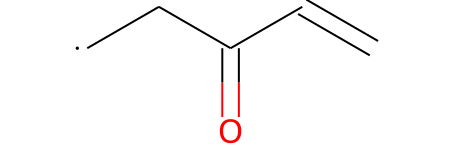

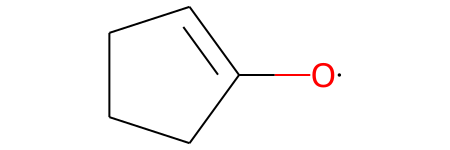

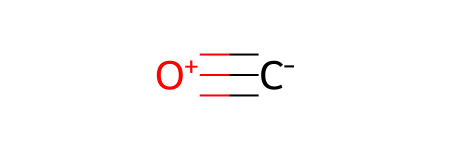

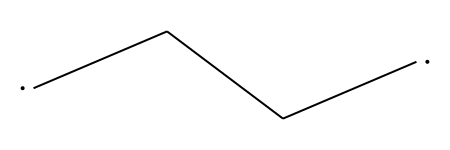

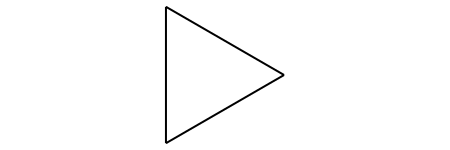

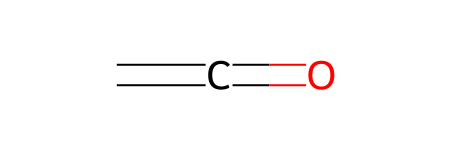

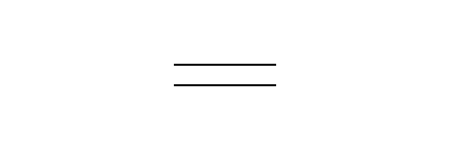

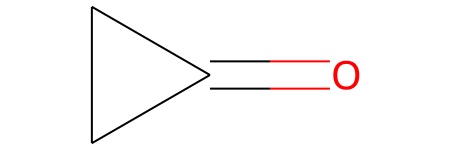

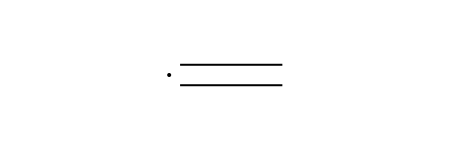

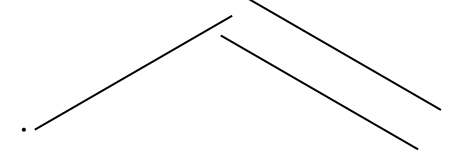

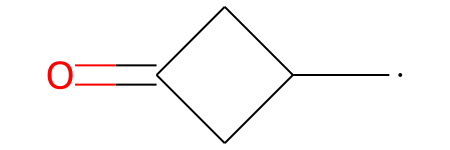

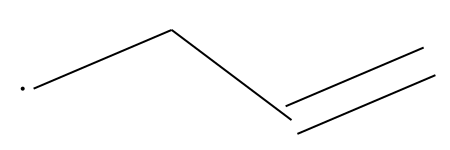

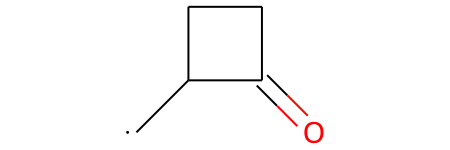

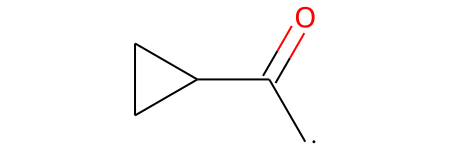

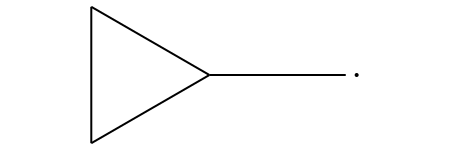

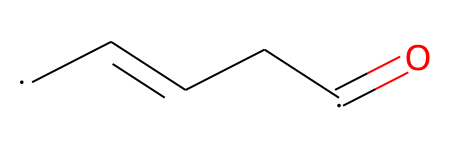

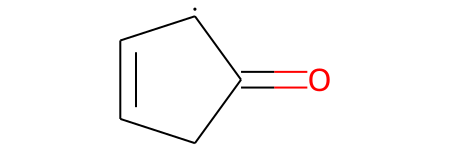

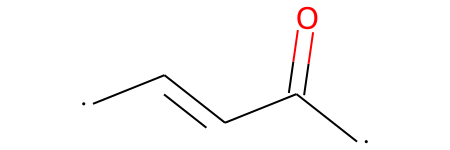

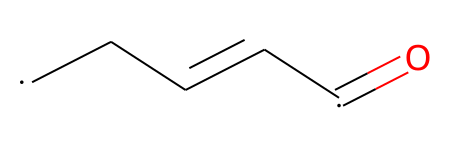

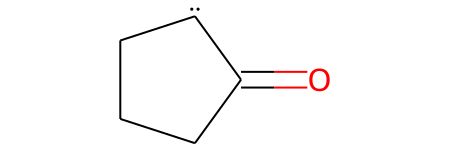

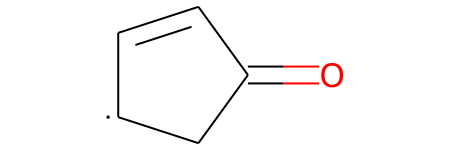

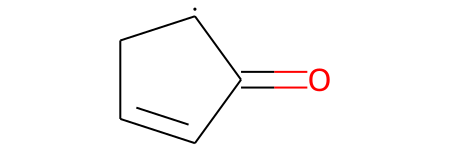

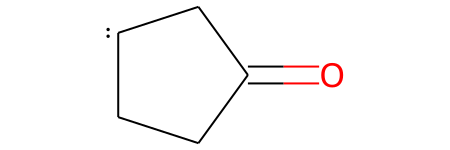

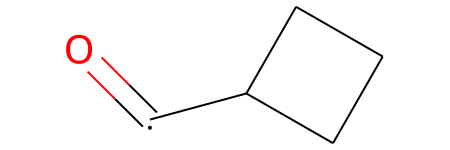

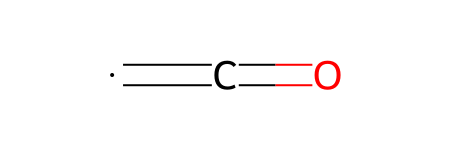

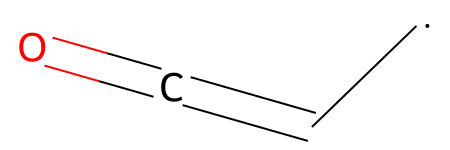

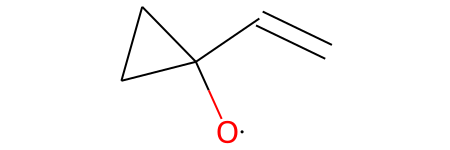

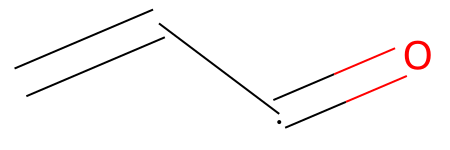

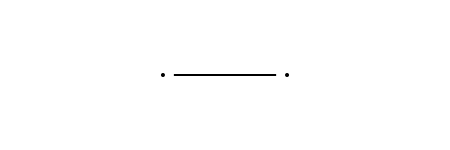

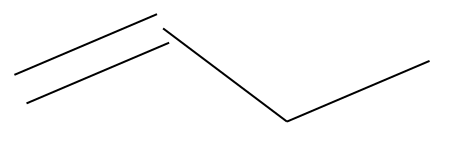

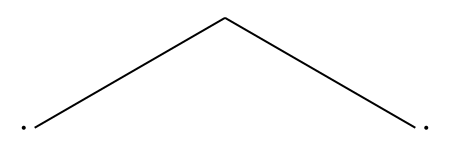

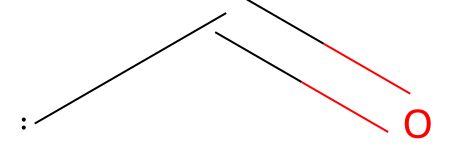

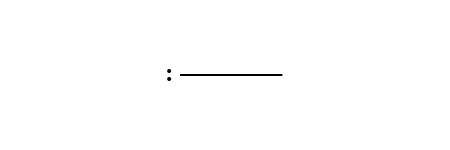

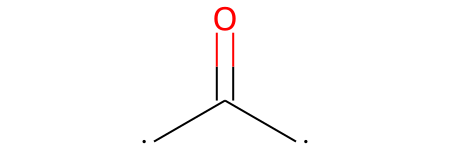

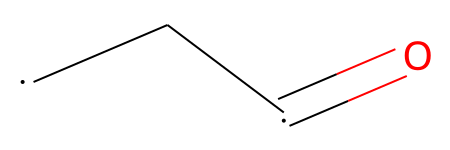

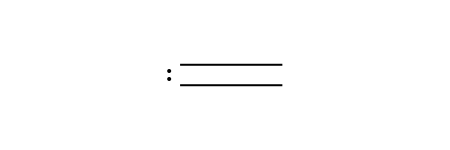

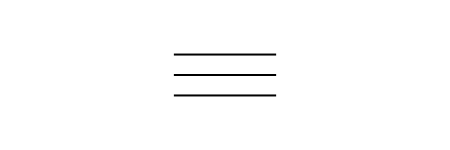

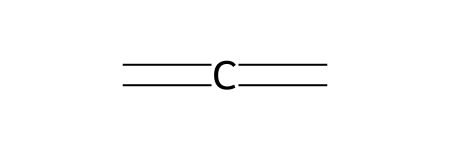

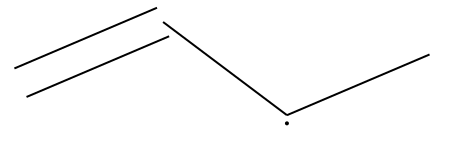

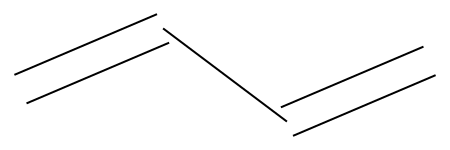

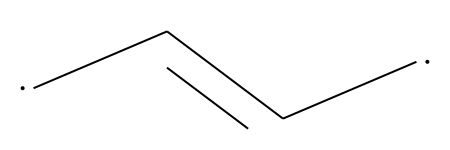

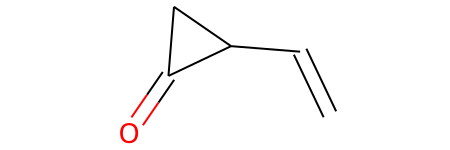

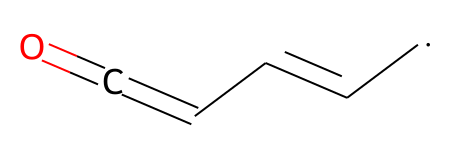

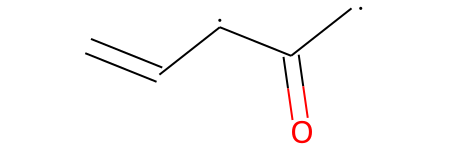

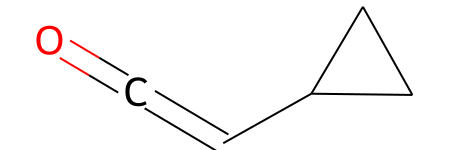

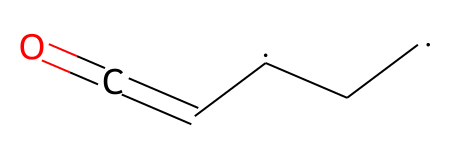

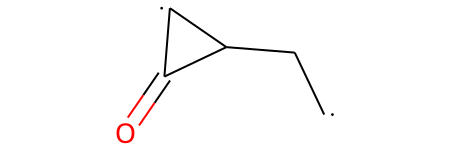

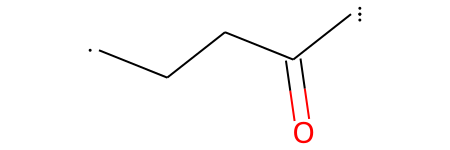

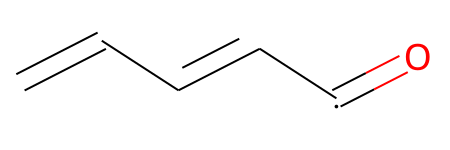

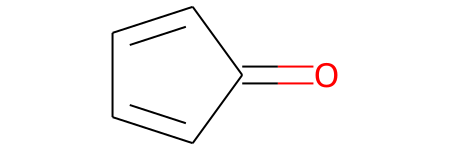

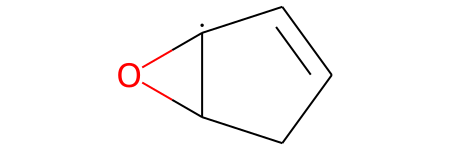

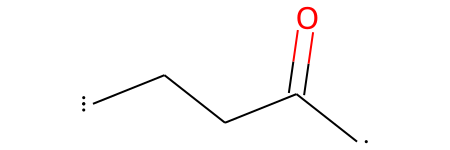

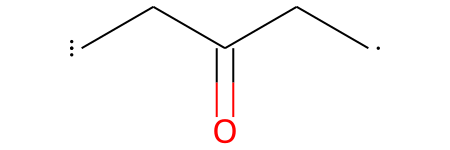

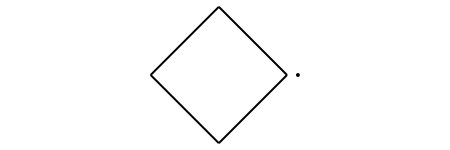

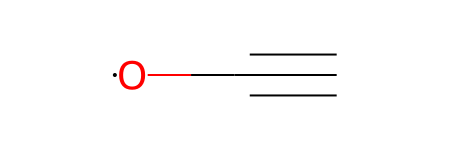

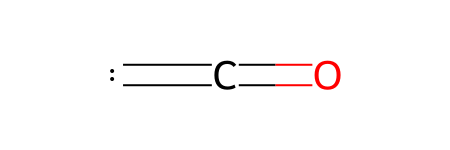

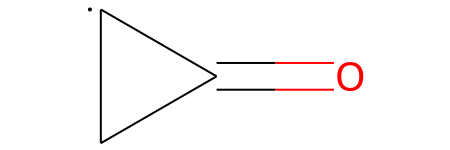

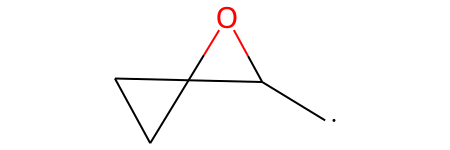

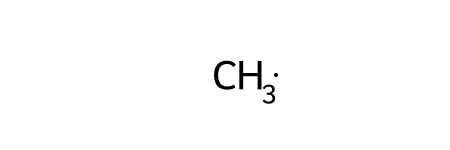

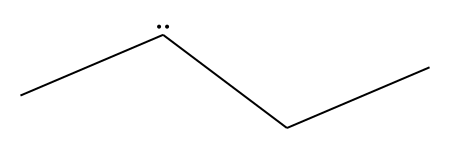

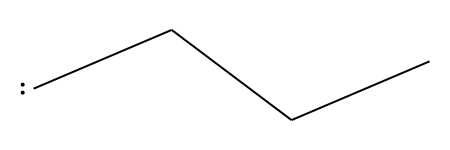

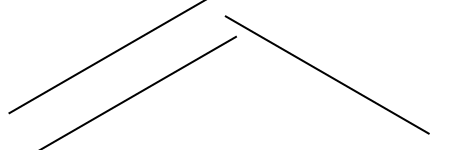

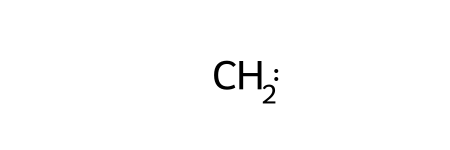

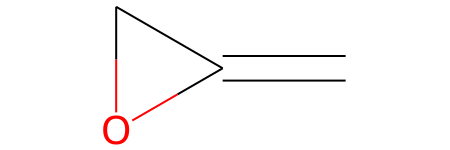

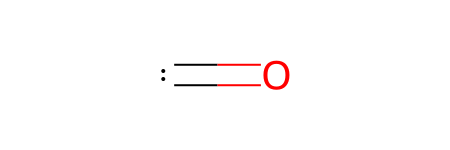

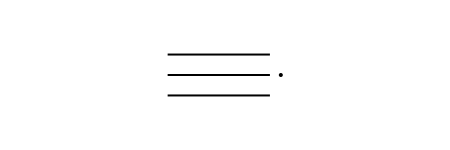

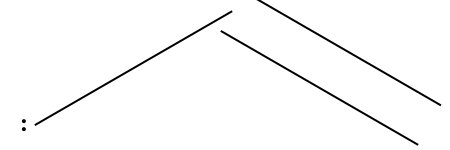

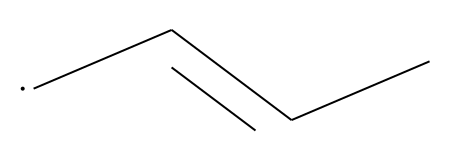

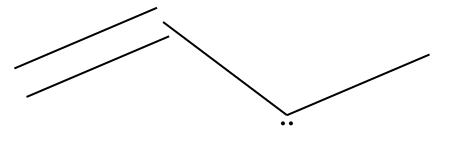

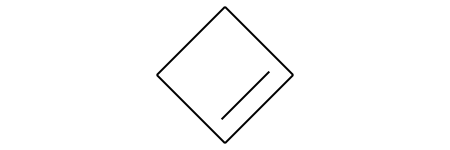

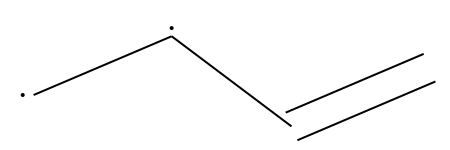

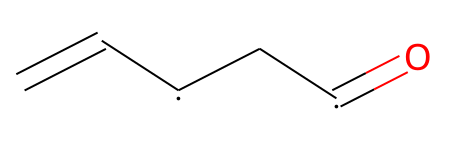

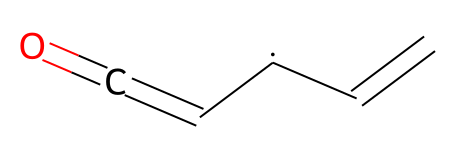

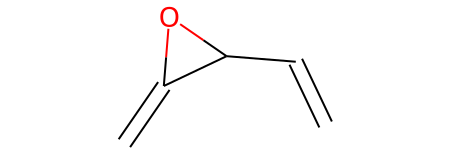

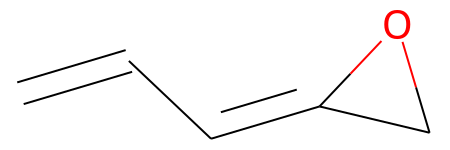

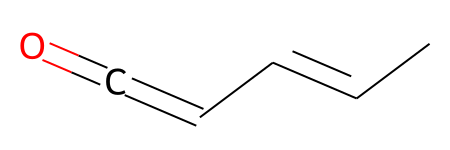

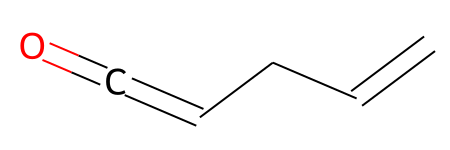

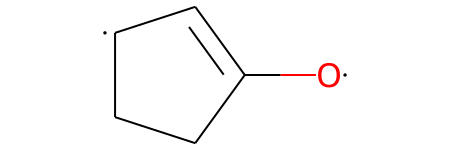

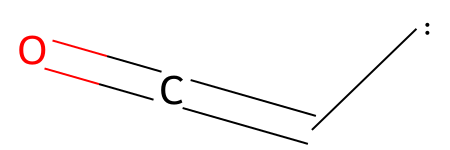

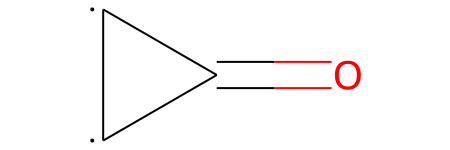

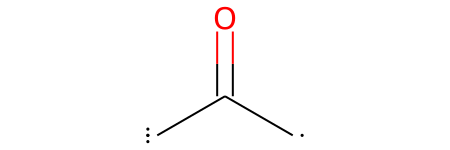

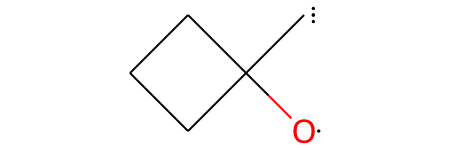

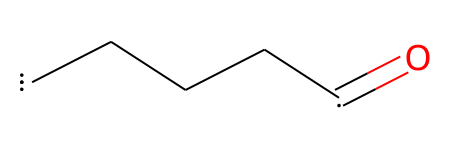

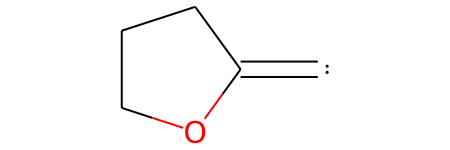

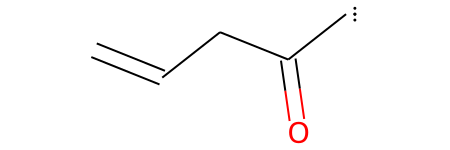

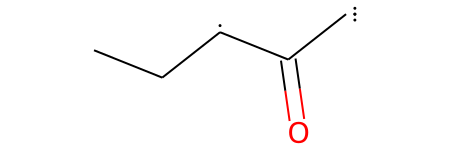

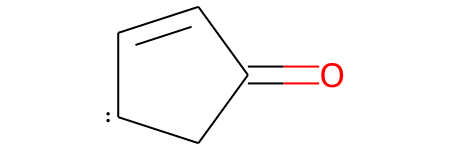

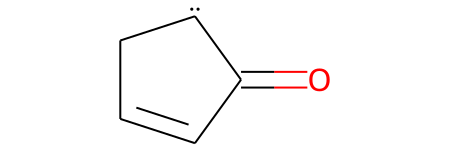

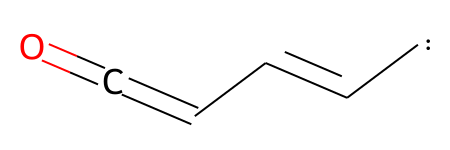

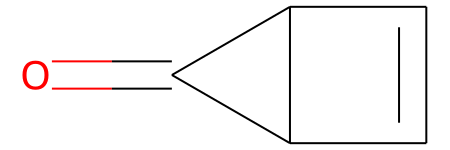

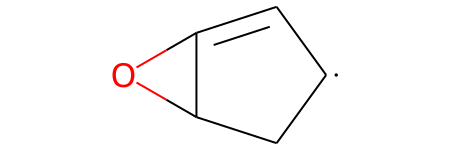

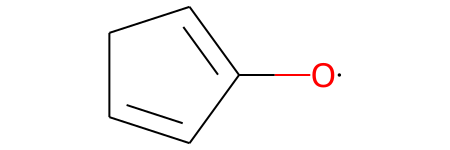

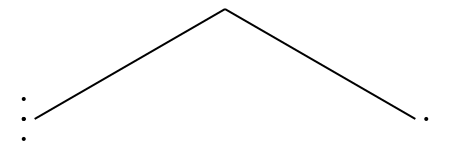

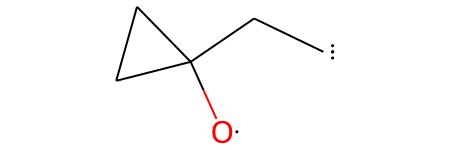

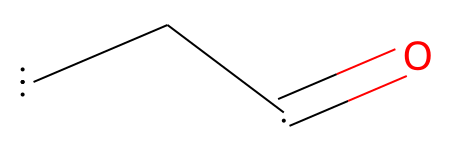

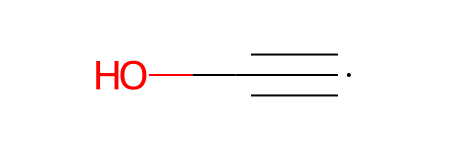

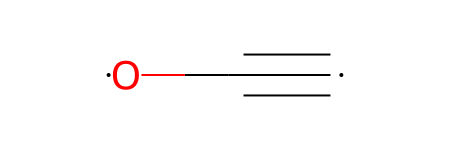

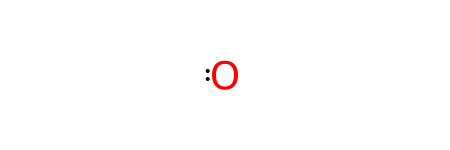

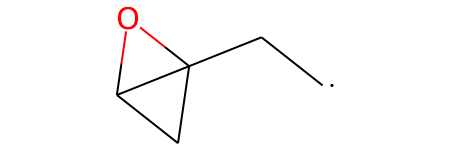

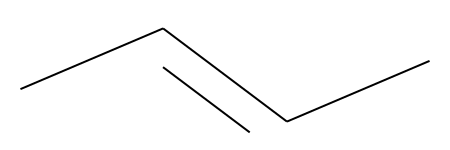

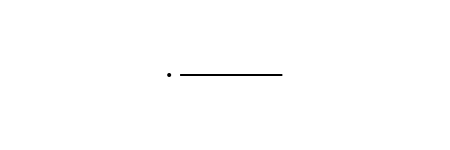

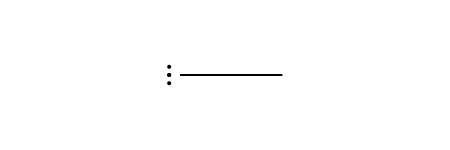

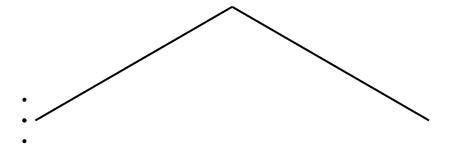

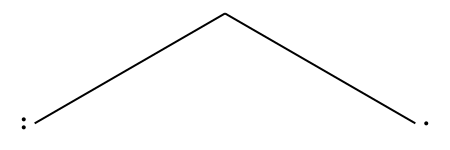

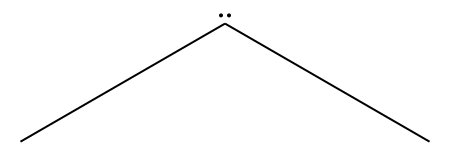

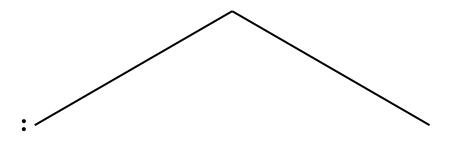

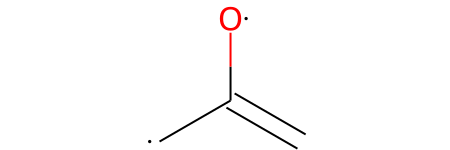

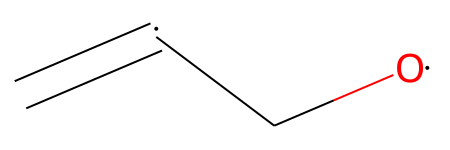

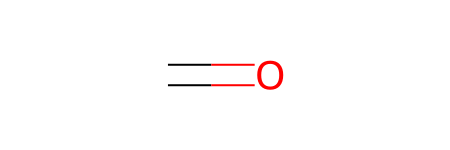

In [7]:
from rdkit import Chem
for key in species_dic.keys():
    mol = Chem.MolFromSmiles(key)
    display(mol)

In [8]:
[['[CH2]CCC=C=O', 'C=C'], ['[CH2]CCC=C=O', '[CH2]C=C=O'], 
 ['[CH2]CC=C', 'C=CC=C'], ['[CH2]CC=C', '[H]'], 
 ['[CH2]CC=C', 'C=C'], ['[CH2]CC=C', '[CH]=C']]

[['[CH2]CCC=C=O', 'C=C'],
 ['[CH2]CCC=C=O', '[CH2]C=C=O'],
 ['[CH2]CC=C', 'C=CC=C'],
 ['[CH2]CC=C', '[H]'],
 ['[CH2]CC=C', 'C=C'],
 ['[CH2]CC=C', '[CH]=C']]

In [9]:
print(15/17)

0.8823529411764706
